In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
from scipy import stats, optimize, integrate
from scipy.optimize import curve_fit
from scipy.integrate import trapezoid
from scipy.stats import poisson, chisquare
import seaborn as sn
import pandas as pd

1. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?

- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
mean = 6.3
var = mean
hurr = 15
Z = abs((hurr - mean))/math.sqrt(var)
print('Z value: ',Z)
pvalue = stats.norm.cdf(-Z)+(1. - stats.norm.cdf(Z))
print('p value: ',pvalue)
print('The probability that we have at least 15 hurricanes is too small to be considered significative')


Z value:  3.4661629670697414
p value:  0.0005279431738299246
The probability that we have at least 15 hurricanes is too small to be considered significative


2. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

var_1 = np.var(pre, ddof =1)
var_2 = np.var(post, ddof =1)
sigma = math.sqrt((var_1 + var_2)/2)

T = abs((np.mean(pre)-np.mean(post))/(sigma*math.sqrt(2/len(pre))))

print('T value: ',T)
print('Considering the t value, the test determine that the change in blood pressures is statistically significant')

T value:  3.786997938137629
Considering the t value, the test determine that the change in blood pressures is statistically significant


3. **Curve fitting of temperature in Alaska**

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max: `17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

- Plot these temperatures.
- Find a suitable a function that can describe min and max temperatures.
- Fit this function to the data with `scipy.optimize.curve_fit()`.
- Plot the result. Is the fit reasonable? If not, why?
- Is the time offset for min and max temperatures the same within the fit accuracy?

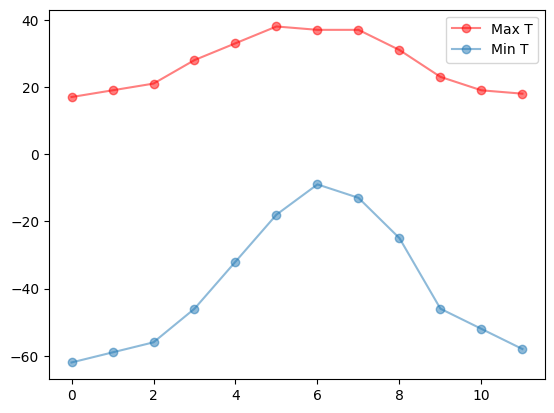

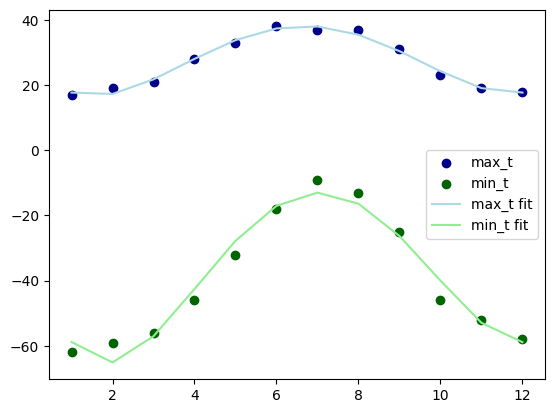

The function for the maximum T is:  26.86363636370569  +  -14.982080419624557 x +  6.623761655026126 x^2 +  -0.8247377622419543 x^3 +  0.030958624706518445 x^4
The function for the minimum T is:  -28.520202020259653  +  -46.00846607107328 x +  17.673052641840094 x^2 +  -2.0580646205713937 x^3 +  0.07393648018446364 x^4
The fit is resonable


In [4]:
max_t = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_t = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

# plot the temperatures
fig, ax = plt.subplots()
line1, = ax.plot(max_t, "o-", label='Max T', color="r", alpha=0.5)
line2, = ax.plot(min_t, "o-", label='Min T', color="C0", alpha=.5)
ax.legend(handles=[line1, line2])
plt.show()

# function that can describe min and max temperatures
def f(x, a0, a1, a2, a3, a4):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3 + a4*x**4

fig, ax = plt.subplots() 
ax.scatter(x=x, y=max_t, marker='o', c='darkblue', label="max_t")
ax.scatter(x=x, y=min_t, marker='o', c='darkgreen', label="min_t")

# Fit of the function with scipy.optimize.curve_fit()
(fa0, fa1, fa2, fa3, fa4), cov = optimize.curve_fit(f, x, max_t)
f_max=np.array([fa0, fa1, fa2, fa3, fa4])
y4 = f(x, fa0, fa1, fa2, fa3, fa4)
ax.plot(x, y4, color='lightblue', label="max_t fit")
(fa0, fa1, fa2, fa3, fa4), cov = optimize.curve_fit(f, x, min_t)
f_min=np.array([fa0, fa1, fa2, fa3, fa4])
y4 = f(x, fa0, fa1, fa2, fa3, fa4)
ax.plot(x, y4, color='lightgreen', label="min_t fit")

ax.legend()
plt.show()

print("The function for the maximum T is: ", f_max[0]," + ",f_max[1],"x + ",f_max[2],"x^2 + ",f_max[3],"x^3 + ",f_max[4],"x^4")
print("The function for the minimum T is: ", f_min[0]," + ",f_min[1],"x + ",f_min[2],"x^2 + ",f_min[3],"x^3 + ",f_min[4],"x^4")

print('The fit is resonable')


4. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

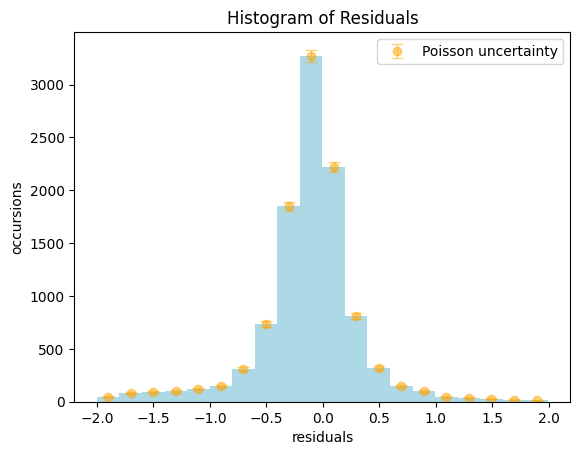

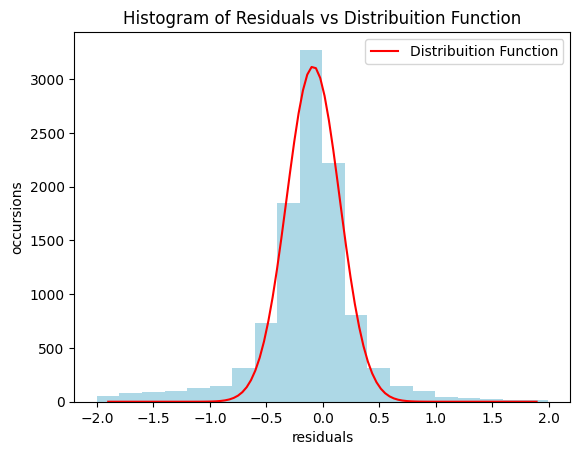

In [5]:
data = pd.read_pickle('Downloads/residuals_261.pkl').tolist()
df = pd.DataFrame(data)

df = df[ abs(df['residuals']) < 2] # I clean the data like I did in lab 7

# plot
fig = plt.figure()
n, bins_edge, _ = plt.hist(df['residuals'], bins=20, density=False, cumulative=False, color = 'lightblue')
plt.title('Histogram of Residuals')
plt.xlabel('residuals')
plt.ylabel('occursions')

# Poisson uncertainty
center = (bins_edge[:-1] + bins_edge[1:]) / 2
plt.errorbar(center, n, yerr=np.sqrt(n), fmt='o', c='orange', linewidth=1, capsize=4, label= "Poisson uncertainty", alpha=0.5)
plt.legend()
plt.show()

# function and fit
def f(x, mu, sigma, a):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

params, covariance = curve_fit(f, center, n, p0=[0, 1, 1])

# Plot
fig2 = plt.figure()
x_fit = np.linspace(min(center), max(center), 100)
y_fit = f(x_fit, *params)
n, bins_edge, _ = plt.hist(df['residuals'], bins=20, density=False, cumulative=False, color = 'lightblue')
plt.plot(x_fit, y_fit, color='red', label='Distribuition Function')
plt.title('Histogram of Residuals vs Distribuition Function')
plt.xlabel('residuals')
plt.ylabel('occursions')
plt.legend()
plt.show()

expected_values = f(center, *params)


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

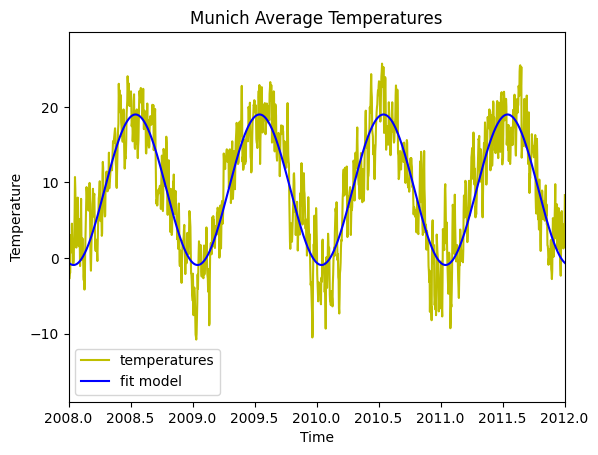

The best-fit values of the parameters are: a = -9.96 , b= 12.31 , c= 9.04
Overall average temperature:  8.93  °C
Typical daily value predicted by the model for the coldest time:  -0.91 °C
Typical daily value predicted by the model for the hottest time:  19.00 °C


'\n# Function g and fit\ndef g(t, a, b, c, d):\n    f = a*np.cos(2*math.pi*b*t + c) + d\n    return f\n\npoptg, pcovg = curve_fit(g, time, temp)\ntemp_new_g = g(time, *poptg)\n'

In [26]:
# download data
data = pd.read_csv('Downloads/munich_temperatures_average_with_bad_data.txt', sep=' ', header=None)
data.columns = ['Date', 'Temperature'] 
df = pd.DataFrame(data) 

df = df.drop(df[abs(df['Temperature']) > 35].index) # I try to clean the data 

# fit the function to the data 
def function(t, a, b, c):
    return a*np.cos(2*math.pi*t + b) + c

time = df['Date']
temp = df['Temperature']

popt, pcov = curve_fit(function, time, temp)
temp_new = function(time, *popt)

# Plot data and fit function
fig = plt.figure()
plt.plot(time, temp,'y', label= 'temperatures')
plt.plot(time, temp_new,'b', label= 'fit model' )
plt.title('Munich Average Temperatures')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.xlim(2008, 2012)
plt.show()

# the best-fit values of the parameters
print("The best-fit values of the parameters are: a =",f'{popt[0]:.2f}', ', b=', f'{popt[1]:.2f}', ', c=', f'{popt[2]:.2f}' )

# average temperatures
print('Overall average temperature: ', f'{np.mean(temp):.2f}', ' °C')

# typical daily average values predicted by the model for the coldest and hottest time of year
cold = np.min(temp_new)
hot = np.max(temp_new)

print('Typical daily value predicted by the model for the coldest time: ',f'{cold:.2f}','°C')
print('Typical daily value predicted by the model for the hottest time: ',f'{hot:.2f}','°C')

# b is the phase of the fit model cosine 

'''
# Function g and fit
def g(t, a, b, c, d):
    f = a*np.cos(2*math.pi*b*t + c) + d
    return f

poptg, pcovg = curve_fit(g, time, temp)
temp_new_g = g(time, *poptg)
'''
